**Importing all required libraries**

In [1]:
! python3 -m pip install tensorflow-macos
! python3 -m pip install tensorflow-metal


  Using cached tensorflow_macos-2.16.2-cp310-cp310-macosx_12_0_arm64.whl.metadata (3.3 kB)
  Using cached tensorflow-2.16.2-cp310-cp310-macosx_12_0_arm64.whl.metadata (4.1 kB)
  Using cached absl_py-2.3.0-py3-none-any.whl.metadata (2.4 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-25.2.10-py2.py3-none-any.whl.metadata (875 bytes)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached h5py-3.13.0-cp310-cp310-macosx_11_0_arm64.whl.metadata (2.5 kB)
  Using cached libclang-18.1.1-1-py2.py3-none-macosx_11_0_arm64.whl.metadata (5.2 kB)
  Using cached ml_dtypes-0.3.2-cp310-cp310-macosx_10_9_universal2.whl.metadata (20 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached protobuf-4.25.8-cp37-abi3-macosx_10_9_universal2.whl.metadata (541 bytes)
  Using cached requests-2.32.3-py3-none-any.whl.metadata (4.6 kB)
  Usi

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import os
import zipfile




Matplotlib is building the font cache; this may take a moment.


In [2]:
# # Step 1: Set up Kaggle API
# !mkdir -p ~/.kaggle
# !cp kaggle.json ~/.kaggle/
# !chmod 600 ~/.kaggle/kaggle.json


In [3]:
# # Step 3: Download the dataset
# !kaggle datasets download -d vipoooool/new-plant-diseases-dataset


In [4]:
# zip_path = "new-plant-diseases-dataset.zip"
# extract_path = "plant_dataset"

# os.makedirs(extract_path, exist_ok=True)

# with zipfile.ZipFile(zip_path, 'r') as zip_ref:
#     zip_ref.extractall(extract_path)

# print("✅ Dataset extracted!")

**Data Preprocessing**

Training image preprocessing

In [3]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    # lables means the subdirectory names
    # which are used as labels for the images it finds automatically from the subdirectory names from the directory
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    verbose=True,
)

Found 70295 files belonging to 38 classes.


2025-06-02 22:10:53.882953: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M4
2025-06-02 22:10:53.882990: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2025-06-02 22:10:53.882998: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
I0000 00:00:1748927453.883031  287084 pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
I0000 00:00:1748927453.883067  287084 pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


#### Validation image preprocessing


In [4]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    verbose=True,
)

Found 17572 files belonging to 38 classes.


In [5]:
training_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

A Convolutional Neural Network (CNN) is a type of deep learning algorithm designed to automatically and adaptively learn patterns from image data, though it’s now also used for video, audio, and even text (in some NLP tasks).

Unlike standard neural networks (where every neuron is connected to every neuron in the next layer), CNNs use convolutional layers that apply filters (also called kernels) to input data, helping them detect spatial hierarchies — from edges to textures to object parts and whole objects.

1. **Input Layer**
You feed the network with a 2D image (for grayscale) or a 3D image (for RGB: height × width × channels).

2. **Convolution Layer**
Applies a small filter (e.g., 3×3 or 5×5) that slides over the image.

Produces a feature map showing where certain patterns (edges, corners) occur.

Multiple filters → multiple feature maps.

Think of this like applying an edge detection or blur filter in Photoshop.

3. **ReLU Activation (Rectified Linear Unit)
Adds non-linearity.**

Converts negative values in feature maps to zero: f(x) = max(0, x).

4. **Pooling Layer** (e.g., Max Pooling)
Reduces the size (downsampling) while keeping important features.

E.g., from 28×28 to 14×14 by selecting the max value in a 2×2 window.

5. **Stacking Multiple Conv + Pool Layers**
Deeper layers learn more complex patterns (e.g., face, object parts).

6. **Flattening**
Converts the final pooled feature map into a 1D vector.

7. **Fully Connected Layer**
Like traditional neural networks. Learns final classification boundaries.

Ends with a Softmax or Sigmoid layer for output (classification or regression).

**To Avoid Overshooting:**

1. choose a small learning rate. default is 0.001 we can use 0.0001
2. There may be chance of underfitting. So, we can increase the number of neurons.
3. Add more convolutional layers to extract more features from images there may be possibility to capture revelant features or models is confusing. due to lack of feature so feed with more features.

**Building the Model**

In [6]:
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten,Dropout
from tensorflow.keras.models import Sequential

In [7]:
model = Sequential()

In [8]:
# Building Convulutional Layer

model.add(Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu', input_shape=(128, 128, 3)))
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

/Users/deva/Desktop/dev/Plant_Disease_Detection/.venv/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

In [10]:
model.add(Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu'))
model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

In [11]:
model.add(Conv2D(filters=256, kernel_size=(3,3), padding='same', activation='relu'))
model.add(Conv2D(filters=256, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

In [12]:
model.add(Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu'))
model.add(Conv2D(filters=512, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

Now we have completed the convolutional layer and max pooling layer

No we need to flatten the output and add a fully connected layer and feed it to the nural network

In [13]:
model.add(Dropout(0.25))

In [14]:
model.add(Flatten())

In [15]:
model.add(Dense(units=1500, activation='relu'))

In [16]:
model.add(Dropout(0.4))

In [17]:
# Output Layer
model.add(Dense(units=38, activation='softmax'))

**Compaling the model**

In [18]:
model.compile(optimizer= tf.keras.optimizers.Adam(
    learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [19]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1500)           │     3,073,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 38)             │        57,038 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,842,762 (29.92 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

**Model Training**

In [20]:
training_history = model.fit(x=training_set, validation_data=validation_set, epochs=10)

Epoch 1/10


2025-06-02 22:11:40.154633: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


2197/2197 ━━━━━━━━━━━━━━━━━━━━ 290s 130ms/step - accuracy: 0.3574 - loss: 2.3191 - val_accuracy: 0.8196 - val_loss: 0.5783
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 297s 135ms/step - accuracy: 0.7980 - loss: 0.6740 - val_accuracy: 0.8847 - val_loss: 0.3689
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 295s 134ms/step - accuracy: 0.8727 - loss: 0.4234 - val_accuracy: 0.9096 - val_loss: 0.3062
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 310s 141ms/step - accuracy: 0.9050 - loss: 0.3239 - val_accuracy: 0.9288 - val_loss: 0.2259
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1214s 553ms/step - accuracy: 0.9279 - loss: 0.2439 - val_accuracy: 0.9118 - val_loss: 0.3408
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 271s 124ms/step - accuracy: 0.9399 - loss: 0.2017 - val_accuracy: 0.9459 - val_loss: 0.1915
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 296s 135ms/step - accuracy: 0.9473 - loss: 0.1835 - val_accuracy: 0.9465 - val_loss: 0.2114
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 314s 143ms/step - accuracy: 0.

**Model Evaluation**

In [21]:
# model evaluation on training set

train_loss, train_acc = model.evaluate(training_set)


2197/2197 ━━━━━━━━━━━━━━━━━━━━ 64s 29ms/step - accuracy: 0.9834 - loss: 0.0564


In [23]:
print(train_loss, train_acc)

0.05035025626420975 0.9846361875534058


In [22]:
# model evaluation on validation set

val_loss, val_acc = model.evaluate(validation_set)


550/550 ━━━━━━━━━━━━━━━━━━━━ 17s 31ms/step - accuracy: 0.9590 - loss: 0.1766


In [24]:
print(val_loss, val_acc)

0.1734243631362915 0.9586273431777954


**Saving Model**

In [ ]:
model.save('trained_model.keras')

In [25]:
training_history.history

{'accuracy': [0.5566256642341614,
  0.8226900696754456,
  0.883192241191864,
  0.9119994044303894,
  0.930820107460022,
  0.9441781044006348,
  0.9497830867767334,
  0.9586172699928284,
  0.9638096690177917,
  0.9666690230369568],
 'loss': [1.5397834777832031,
  0.5873846411705017,
  0.3873715102672577,
  0.2914021611213684,
  0.2343635857105255,
  0.19271202385425568,
  0.17416784167289734,
  0.1473507583141327,
  0.13100840151309967,
  0.12111692130565643],
 'val_accuracy': [0.8195993900299072,
  0.8847029209136963,
  0.9096289277076721,
  0.9288071990013123,
  0.9117915034294128,
  0.9459367394447327,
  0.9465057849884033,
  0.9508877992630005,
  0.948554515838623,
  0.9586273431777954],
 'val_loss': [0.578255295753479,
  0.36894887685775757,
  0.30624544620513916,
  0.22592926025390625,
  0.3407873511314392,
  0.1914921998977661,
  0.21140678226947784,
  0.20489618182182312,
  0.21532732248306274,
  0.17342430353164673]}

In [26]:
# Recording the training history in jason format
import json
with open('training_hist.json', 'w') as f:
    json.dump(training_history.history, f)

### Accuracy Visualization

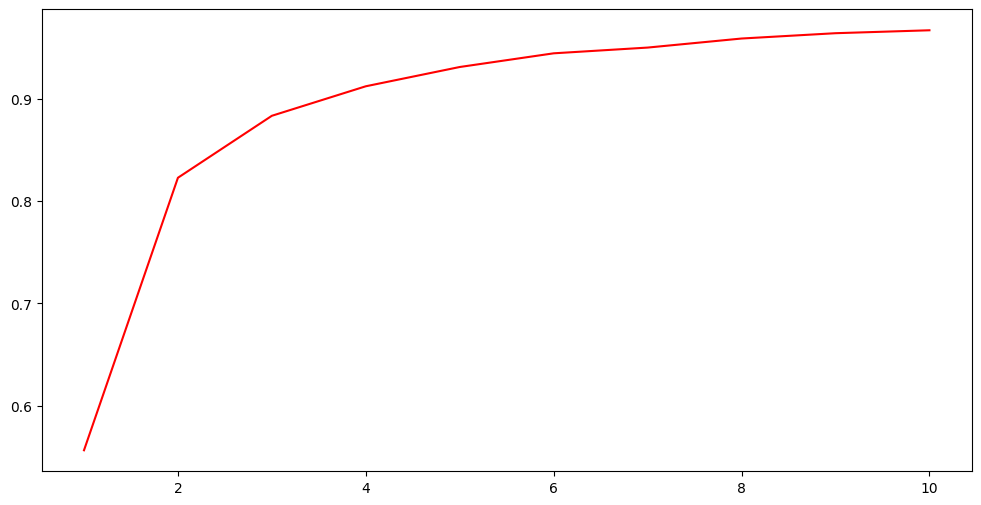

In [27]:
epochs = [i for i in range(1, 11)]
# Plotting the training and validation accuracy
plt.figure(figsize=(12, 6))
plt.plot(epochs, training_history.history['accuracy'], color='red', label='Training Accuracy')

### Some other matrices for model evaluation

In [28]:
class_names = validation_set.class_names

class_names

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [29]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    verbose=True,
)

Found 17572 files belonging to 38 classes.


In [30]:

from tensorflow.keras.models import load_model

# Load the saved model
saved_model = load_model('trained_model.keras')

# Predict using the saved model
y_pred = saved_model.predict(test_set)

  4/550 ━━━━━━━━━━━━━━━━━━━━ 12s 24ms/step  

/Users/deva/Desktop/dev/Plant_Disease_Detection/.venv/lib/python3.10/site-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 26 variables whereas the saved optimizer has 50 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


550/550 ━━━━━━━━━━━━━━━━━━━━ 15s 27ms/step


In [ ]:
# y_pred = model.predict(test_set)

550/550 ━━━━━━━━━━━━━━━━━━━━ 82s 149ms/step


In [31]:
model = saved_model

In [32]:
y_pred, y_pred.shape

(array([[1.0000000e+00, 3.2805348e-17, 9.5313421e-22, ..., 7.6736118e-32,
         9.6012326e-28, 1.5649759e-26],
        [1.0000000e+00, 2.4262218e-19, 5.7495620e-28, ..., 0.0000000e+00,
         2.6379189e-29, 7.4429782e-37],
        [1.0000000e+00, 3.5752201e-19, 7.9349491e-24, ..., 1.4200669e-38,
         1.1158601e-25, 1.9902118e-28],
        ...,
        [1.0555103e-14, 2.3009033e-22, 4.5402769e-17, ..., 3.0086557e-16,
         2.8594562e-17, 1.0000000e+00],
        [7.6184572e-13, 1.5228245e-22, 3.2082855e-16, ..., 6.6904206e-15,
         2.0529462e-16, 1.0000000e+00],
        [1.0227918e-25, 2.4880367e-25, 6.2148921e-26, ..., 2.3781064e-26,
         1.8826804e-18, 1.0000000e+00]], dtype=float32),
 (17572, 38))

In [33]:
predicted_categories = tf.argmax(y_pred, axis=1)
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [34]:
true_categories = tf.concat([y for x,y in test_set], axis=0)
true_categories

2025-06-02 23:20:08.592958: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


<tf.Tensor: shape=(17572, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [35]:
Y_true = tf.argmax(true_categories, axis=1)
Y_true


<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [36]:
from sklearn.metrics import classification_report, confusion_matrix

In [37]:
classification_report = classification_report(Y_true, predicted_categories, target_names=class_names)
print(classification_report)

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.87      0.98      0.93       504
                                 Apple___Black_rot       0.98      0.99      0.98       497
                          Apple___Cedar_apple_rust       0.96      0.98      0.97       440
                                   Apple___healthy       0.99      0.89      0.94       502
                               Blueberry___healthy       0.95      0.98      0.97       454
          Cherry_(including_sour)___Powdery_mildew       0.99      0.99      0.99       421
                 Cherry_(including_sour)___healthy       0.98      0.99      0.99       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.91      0.92      0.91       410
                       Corn_(maize)___Common_rust_       0.96      1.00      0.98       477
               Corn_(maize)___Northern_Leaf_Blight       0.95      0.95      0.

In [38]:
cm = confusion_matrix(Y_true, predicted_categories)

In [39]:
cm.shape

(38, 38)

### Confusion Matrix Visualization

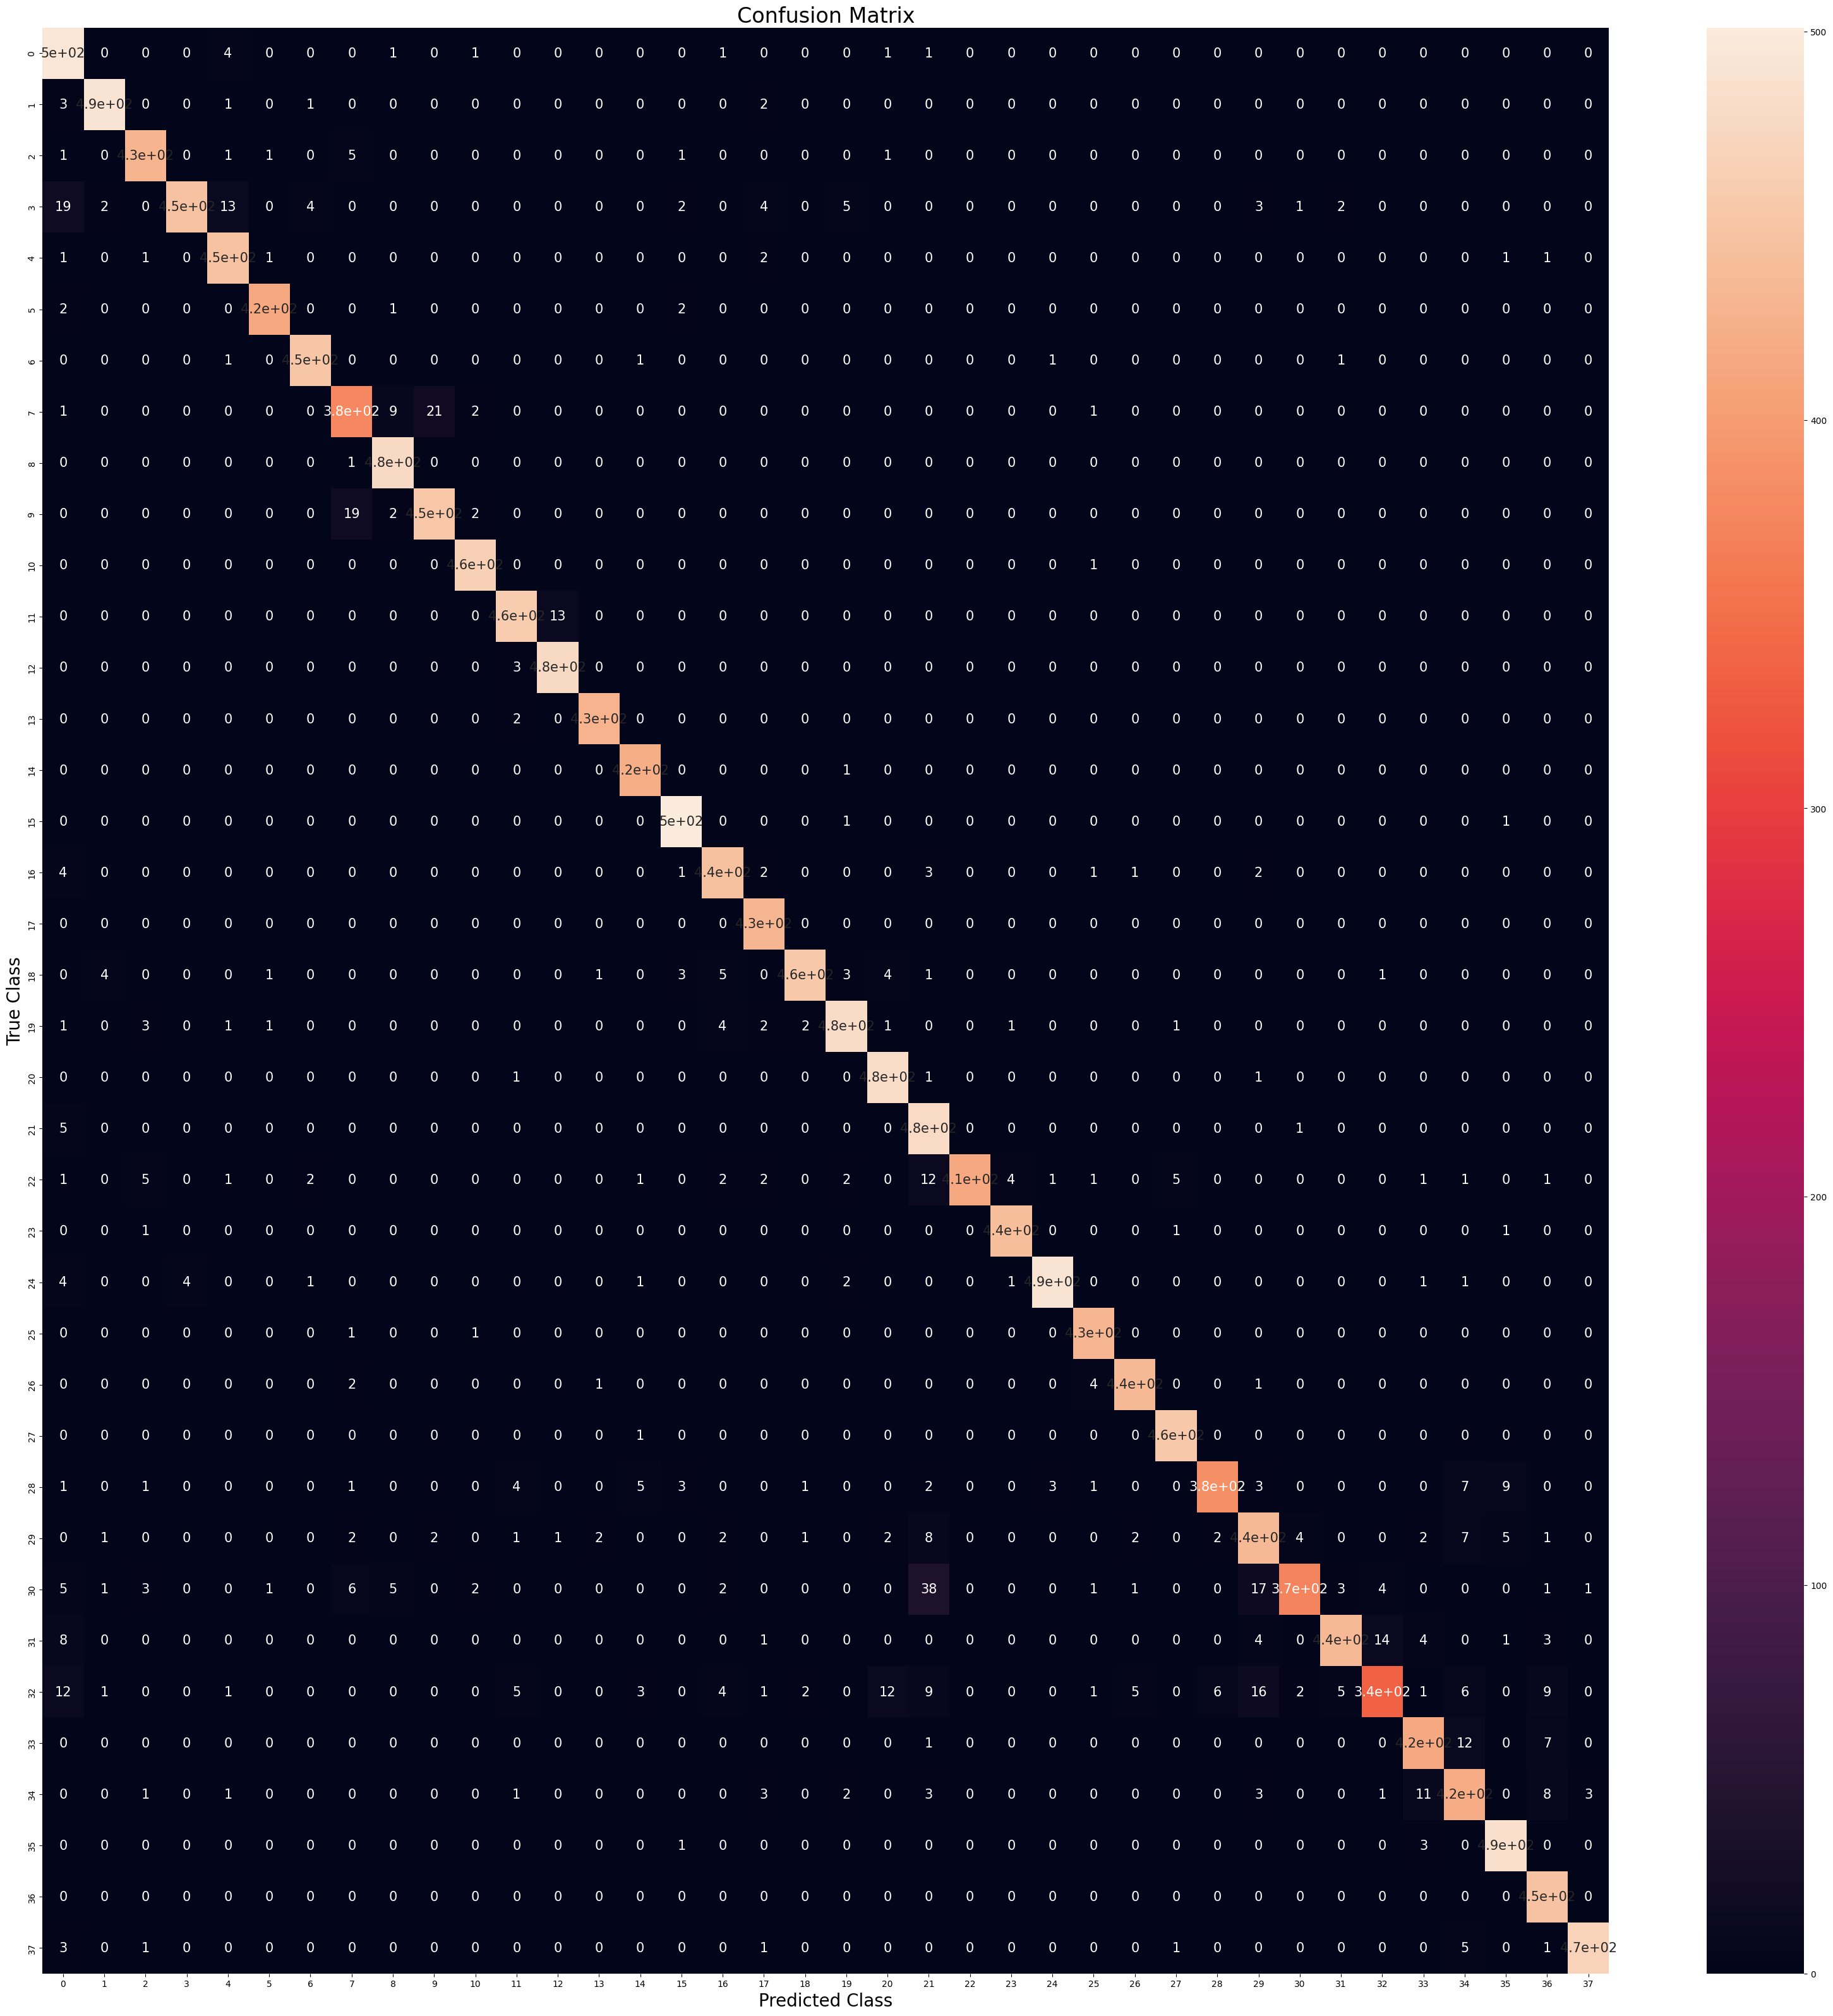

In [40]:
plt.figure(figsize=(40, 40))
sns.heatmap(cm, annot=True, annot_kws={"size": 15})
plt.xlabel('Predicted Class', fontsize=20)
plt.ylabel('True Class', fontsize=20)
plt.title('Confusion Matrix', fontsize=24)
plt.show()